In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Lnk(nodes, x, k):
    value = 1
    n = len(nodes)
    for i in range(n):
        if(i == k): 
            continue
        value *= (x - nodes[i])/(nodes[k]-nodes[i])
            
    return value

def Pn(x, nodes, images):
    n = len(nodes)
    values = []
    for k in range(n):
        values.append(images[k]*Lnk(nodes,x,k))
    return np.sum(values)

def Interpolacion_Lagrange(x, nodes, images):
        values = [Pn(xk, nodes,images) for xk in x]
        plt.plot(x,values, label="Lagrange")
        plt.legend()


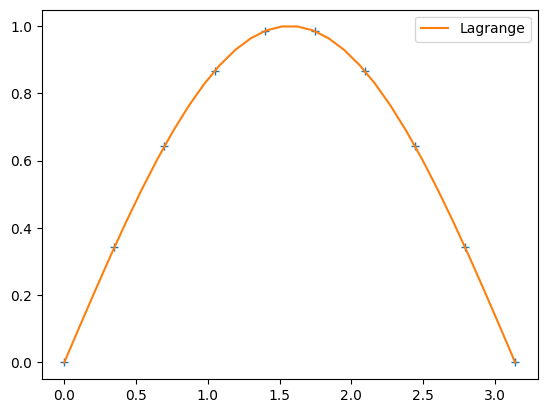

In [3]:
nodes = np.linspace(0, np.pi, 10)
images = np.sin(nodes)

x = np.linspace(0,np.pi, 30)
plt.plot(nodes,images, '+')
Interpolacion_Lagrange(x,nodes,images)
plt.show()



In [4]:
Er, Gamma = 78, 55
E = 75 
sigma0 = 83.5*((E - Er)**2. + Gamma**2./4.)
sigma_ana = lambda E: sigma0/((E - Er)**2. + Gamma**2./4.)

E = np.linspace(0,200,1000)
plt.plot(E,sigma_ana(E),'--',label='Analítica')


Energia  = np.arange(0,225, 25) 
sigma_exp = sigma_ana(Energia)



plt.plot(Energia,sigma_exp,"*",label='datos')
Interpolacion_Lagrange(E,Energia, sigma_exp)


Es claro notar que a mayor grado del polinomio, mayor cantidad de picos
Tambien note que si se concatenan diversas interpolaciones como en el ejemplo siguiente la curva deja de ser suave

In [5]:
Er, Gamma = 78, 55
E = 75 
sigma0 = 83.5*((E - Er)**2. + Gamma**2./4.)
sigma_ana = lambda E: sigma0/((E - Er)**2. + Gamma**2./4.)

E = np.linspace(0,75,1000)
plt.plot(E,sigma_ana(E),'--',label='Analítica')


Energia  = np.arange(0,100, 25) 
sigma_exp = sigma_ana(Energia)



plt.plot(Energia,sigma_exp,"*",label='datos')
plt.plot(E + 75, sigma_ana(E + 75), '--')
plt.plot(E + 75 * 2, sigma_ana(E + 75*2), '--')
Interpolacion_Lagrange(E,Energia, sigma_exp)
Interpolacion_Lagrange(E + 75, Energia + 75, sigma_ana(Energia + 75))
Interpolacion_Lagrange(E + 75 * 2, Energia + 75 * 2, sigma_ana(Energia + 75 * 2))
plt.show()